![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Start coding here
# Use as many cells as you need

### Explore the `crimes.csv` dataset and use your findings to answer the following questions:

**Q1. Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour.`**  

In [3]:
crimes['HOUR OCC'] = crimes['TIME OCC'].apply(lambda x : x[0:2]).astype('int')
crimes[['TIME OCC', 'HOUR OCC']].head()

,TIME OCC,HOUR OCC
0,1110,11
1,1620,16
2,1200,12
3,0635,6
4,0900,9


In [4]:
peak_crime_hour = crimes['HOUR OCC'].value_counts().index[0]
print(f'The hour with the highest crime frequency is {peak_crime_hour}')

The hour with the highest crime frequency is 12


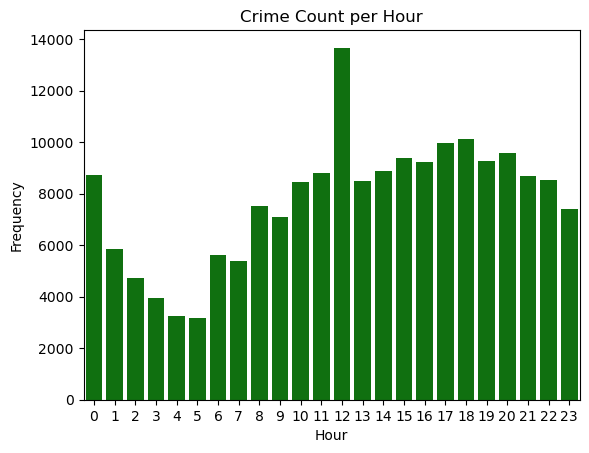

In [5]:
# Visualize
g = sns.countplot(data = crimes, x = 'HOUR OCC', color = 'green')
g.set(xlabel = 'Hour', ylabel = 'Frequency')
g.set_title('Crime Count per Hour')
plt.show()

**Q2. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location.`** 

In [6]:
# View data
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [7]:
# Filter for crimes occuring between 10pm and 3:59 am
night_crimes = crimes[(crimes['HOUR OCC'] >= 22) | (crimes['HOUR OCC'] < 4)]
night_crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,0001,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,0
10,221711184,2022-06-15,2020-05-15,0155,Devonshire,THEFT OF IDENTITY,27,M,B,NaN,Invest Cont,8300 WHITE OAK AV,1
30,221314362,2022-07-11,2020-04-07,0001,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,0
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,0001,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,0


In [8]:
# Get the area with the most crimes by counting occurences
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().index[0]
print(f'The area with the largest frequency of night crimes is {peak_night_crime_location}')

The area with the largest frequency of night crimes is Central


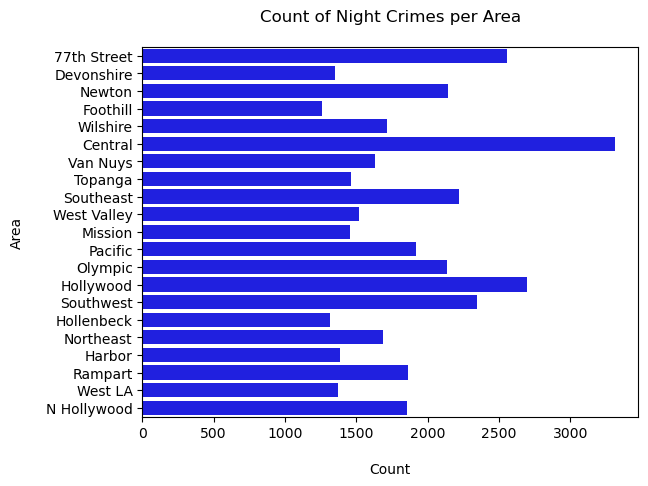

In [9]:
# Visualize
g = sns.countplot(data = night_crimes, y = 'AREA NAME', color = 'blue')
g.set(xlabel = '\nCount', ylabel = 'Area\n')
g.set_title('Count of Night Crimes per Area\n')
plt.show()

**Q3. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels :** 
* "0-17" 
* "18-25" 
* "26-34" 
* "35-44" 
* "45-54" 
* "55-64" and 
* "65+" `as the index and the frequency of crimes as the values.`

In [10]:
# View data
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,6
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,9


In [11]:
# we need to create a new column for age groups
# label the ages 
age_groups = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64"]

# create the separation points
conditions = [
    (crimes['Vict Age'] >= 0) & (crimes['Vict Age'] <= 17),
    (crimes['Vict Age'] >= 18) & (crimes['Vict Age'] <= 25),
    (crimes['Vict Age'] >= 26) & (crimes['Vict Age'] <= 34),
    (crimes['Vict Age'] >= 35) & (crimes['Vict Age'] <= 44),
    (crimes['Vict Age'] >= 45) & (crimes['Vict Age'] <= 54),
    (crimes['Vict Age'] >= 55) & (crimes['Vict Age'] <= 64) 
]

In [12]:
# Create the age groups column  with default group as 65+
crimes['Age Group'] = np.select(conditions, age_groups, default = '65+')
crimes[['Vict Age', 'Age Group']].head(10)

,Vict Age,Age Group
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+
5,28,26-34
6,33,26-34
7,35,35-44
8,72,65+
9,21,18-25


In [13]:
# count the number of crimes per age group
# Save as a pandas Series Object
victim_ages = pd.Series(crimes.groupby('Age Group')['Age Group'].count())
victim_ages

Age Group
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Group, dtype: int64

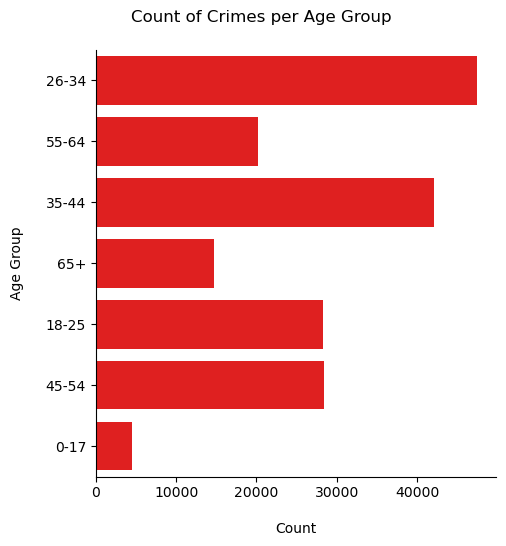

In [14]:
# Visualize
g = sns.catplot(data = crimes, y = 'Age Group', kind = 'count', color = 'red')
g.fig.suptitle('Count of Crimes per Age Group', y = 1.05)
g.set(xlabel = '\nCount', ylabel = 'Age Group\n')
plt.show()